In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11

from functools import partial, reduce
from itertools import product

import seaborn as sns


from analyze_data import result, get_summary

from create_figures import add_p_bars, boxplot, add_multilevel_xticks, lineplot

from matplotlib.ticker import AutoMinorLocator

folder = '/media/raphael/PortableSSD/diploma_thesis/Data/'

def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    if ax.get_legend() != None:
        ax.get_legend().set_title("")
        ax.get_legend().set(alpha = 0, frame_on=False)
    return ax


In [2]:
f = result().read(f"{folder}/4. Plasmid does not inhibit Synthesis of GFP-tagged α-Synuclein/Flourometry/Results.csv")
f.summarize(values = "Mean_norm").round(2).head()

,mean,sd,ci_lo,ci_hi,count
Group1,,,,,
X,1.00,0.12,0.94,1.06,15
TP,0.43,0.11,0.38,0.49,15
FY,0.58,0.16,0.50,0.66,15


In [3]:
f.create_p_table().round(decimals=3).head()

,Group1,p,star
Group1,,,
X,TP,0.0,****
X,FY,0.0,****


/tmp/ipykernel_16416/1976688761.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


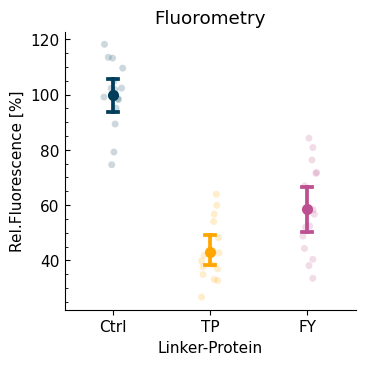

In [4]:

def prettify_pointplot(ax):
    ax.tick_params(bottom = True)
    return ax

def pointplot(data, 
                x=None, 
                y=None ,
                hue = None,
                ax=None, 
                y_scale = 1,
                rm_outliers = False,
                thin = 1,
                jitter = 0.2,
                d_bool = False,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                **kwargs):
    if x == hue:
        d_bool = False
        dodge = False
    sns.stripplot(
    data=data, x=x, y=y, hue=hue,
    dodge=d_bool, alpha=.2, legend=False,
    palette=palette,
    ax=ax
    )
    sns.pointplot(
        data=data, x=x, y=y, hue=hue,
        dodge=dodge, errorbar="ci",
        marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.1,
        ax=ax,
        palette=palette
    )
    
    return ax
f.df["Mean_norm"] = 100 * f.df["Mean_norm"]
fig1,ax = plt.subplots(figsize = (3.54,3.54), layout = "constrained")
ax = pointplot(data = f.df,
                 x = "Group1",
                 y = "Mean_norm",
                 hue = "Group1",
                 y_scale = 1,
                 jitter = 0.4,
                 ax=ax)
ax = prettify(ax,
              title = "Fluorometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Fluorescence","%"))
ax = prettify_pointplot(ax)
ax.tick_params(axis = "x",which = "both", 
                   direction = "out")
ax.set_xticklabels(["Ctrl","TP","FY"])
# ax.set_ylim(0,140)
fig1.savefig("../../plots/Fig6_Fluorometry.svg", format = "svg")

In [5]:
d = result().read(f"{folder}/4. Plasmid does not inhibit Synthesis of GFP-tagged α-Synuclein/WB/Results.csv")
d.summarize(values = "aSyn_norm").round(2).head()

,mean,sd,ci_lo,ci_hi,count
Group1,,,,,
X,1.00,0.00,1.00,1.00,3
TP,0.59,0.02,0.57,0.61,3
FY,0.70,0.11,0.58,0.85,3


In [6]:
d.create_p_table(ci = True).round(decimals=3).head()

,Group1,p,star
Group1,,,
X,TP,0.0,****
X,FY,0.0,****


/tmp/ipykernel_16416/3980846825.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


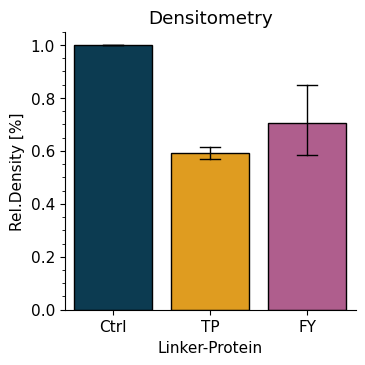

In [7]:
fig2,ax = plt.subplots(figsize = (3.54,3.54), layout = "constrained")
ax = sns.barplot(data = d.df,
                x = "Group1",
                y = "aSyn_norm",
                hue = "Group1",
                legend = False,
                ax = ax,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                seed = 888,
                alpha = 1,
                capsize = 0.2,
                err_kws = {
                     "linewidth": 1,
                     "color":"0"
                })
ax = sns.barplot(data = d.df,
                x = "Group1",
                y = "aSyn_norm",
                ax = ax,
                color = "k",
                fill = False,
                linewidth = 1,
                errorbar = None)
ax = prettify(ax,
              title = "Densitometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Density","%"))
ax.set_xticklabels(["Ctrl","TP","FY"])
ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")
# fig2.tight_layout
fig2.savefig("../../plots/Fig6_Dens.svg", format = "svg")

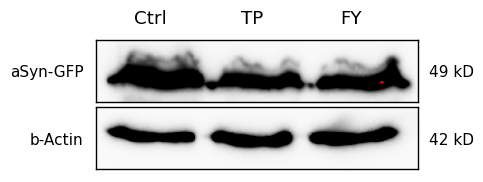

In [8]:
from create_figures import WesternBlot
import skimage as ski

image2 = ski.io.imread(f"{folder}/4. Plasmid does not inhibit Synthesis of GFP-tagged α-Synuclein/WB/Img_Final/1_b-Actin.tif")
image1 = ski.io.imread(f"{folder}/4. Plasmid does not inhibit Synthesis of GFP-tagged α-Synuclein/WB/Img_Final/0_aSyn.tif")
fig3, ax = plt.subplots(figsize = (3.54*4/3, 3.54), layout = "constrained")
wb = (WesternBlot(border = 0.1)
      .add_lane(image = image2,
                protein ="b-Actin",
                weight = 42)
      .add_lane(image = image1,
                protein ="aSyn-GFP",
                weight = 49)
      .add_labels(["Ctrl","TP","FY"])
      .plot(ax))

ax.tick_params(axis = "y", labelrotation = 0)
fig3.savefig("../../plots/Fig6_WB.svg", format = "svg",bbox_inches='tight')

In [9]:
p = result().read(f"{folder}/9. Bortezomib/Flourometry/Results.csv")
p.summarize(values = "Mean_norm", groups = ["Group2","Group1"]).round(2).head(100)

mean    sd  ci_lo  ci_hi  count
Group2 Group1                                 
80     X       1.00  0.18   0.85   1.10      8
       TP      0.55  0.15   0.44   0.64      8
       FY      0.51  0.29   0.31   0.70      8
40     X       1.00  0.26   0.81   1.15      8
       TP      0.56  0.10   0.49   0.62      8
       FY      0.60  0.25   0.44   0.77      8
20     X       1.00  0.16   0.88   1.11      8
       TP      0.60  0.16   0.49   0.72      8
       FY      0.71  0.17   0.60   0.83      8
10     X       1.00  0.16   0.87   1.11      8
       TP      0.56  0.14   0.46   0.65      8
       FY      0.62  0.27   0.44   0.80      8
5      X       1.00  0.38   0.72   1.24      8
       TP      0.58  0.18   0.43   0.68      8
       FY      0.79  0.30   0.57   0.99      8
0      X       1.00  0.18   0.86   1.12      8
       TP      0.60  0.07   0.55   0.65      8
       FY      0.76  0.17   0.64   0.88      8

In [10]:
p.create_p_table().round(3).head(100)

/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:87: PerformanceWarning: indexing past lexsort depth may impact performance.
  control_v = data[pair[0]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:88: PerformanceWarning: indexing past lexsort depth may impact performance.
  treatment_v = data.loc[pair[1]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:112: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  p_table.stack(p_table.index.names)


Group2 Group1      p  star
Group2 Group1                            
80     X           80     TP  0.000  ****
       X           80     FY  0.001    **
40     X           40     TP  0.000   ***
       X           40     FY  0.006    **
20     X           20     TP  0.000   ***
       X           20     FY  0.003    **
10     X           10     TP  0.000  ****
       X           10     FY  0.003    **
5      X            5     TP  0.010    **
       X            5     FY  0.130    ns
0      X            0     TP  0.000  ****
       X            0     FY  0.014     *

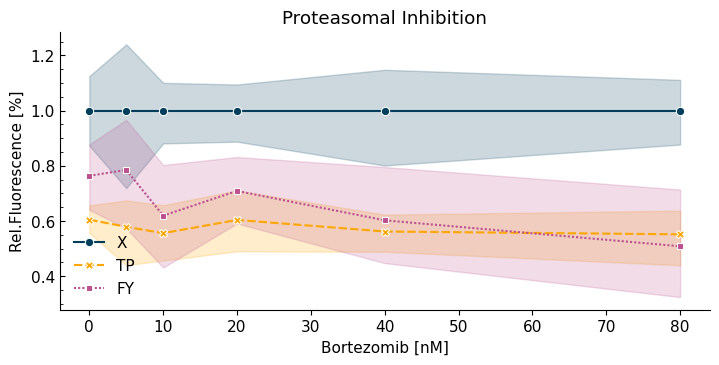

In [11]:
fig4,ax = plt.subplots(figsize = (3.54*2,3.54), layout = "constrained")
ax = sns.lineplot(p.df,
                  x = "Group2",
                  y = "Mean_norm",
                  hue = "Group1",
                ax = ax,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                style="Group1",
                markers = True)
ax = prettify(ax,
              title = "Proteasomal Inhibition",
              x = ("Bortezomib","nM"),
              y = ("Rel.Fluorescence","%"))
ax = prettify_pointplot(ax)
ax.tick_params(axis = "x",which = "both", 
                   direction = "out")
# ax.set_xticklabels(["Ctrl","TP","FY"])
# ax.set_xlim(0,100)
# ax.get_legend().remove()
# ax.get_legend().set( = '14')
fig4.savefig("../../plots/Fig6_Lineplot.svg", format = "svg")